# semantic similarity

First step, merge. 1.
1. The two files are named "dictionary 1-robot.xlsx" and "dictionary 2non-robot.xlsx".
2. Please merge sheet2 of the two tables into a new table according to the following rules: 2.1.
2.1. The structure of the two tables is exactly the same, with the headers "Patent #" "publication year" "keyword from n-gram", please merge the two tables into a single table.
2.2. before merging, iterate over "patent #" if the two tables have identical "patent #" then, "publication year" keep one of them, "keyword from n-gram" merge it and space it with ";".

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd

# Define the file names
file1 = "/content/drive/MyDrive/Colab/semantic_similarity/dictionary 1-robot.xlsx"
file2 = "/content/drive/MyDrive/Colab/semantic_similarity/dictionary 2non-robot.xlsx"

# Load sheet2 from both Excel files
df1 = pd.read_excel(file1, sheet_name="sheet2")
df2 = pd.read_excel(file2, sheet_name="sheet2")

# Merge the two DataFrames based on the "Patent #" column
merged_df = pd.merge(df1, df2, on="Patent #", how="outer")

# Define a function to merge the "keyword from n-gram" columns with ";"
def merge_keywords(row):
    keywords1 = str(row["keyword from n-gram_x"])
    keywords2 = str(row["keyword from n-gram_y"])
    if keywords1 == "nan":
        return keywords2
    elif keywords2 == "nan":
        return keywords1
    else:
        return keywords1 + "; " + keywords2

# Apply the function to merge the "keyword from n-gram" columns
merged_df["keyword from n-gram"] = merged_df.apply(merge_keywords, axis=1)

# Drop the redundant columns and keep one "publication year" and "PRLI"
merged_df = merged_df.drop(columns=["publication year_y", "PRLI_y", "keyword from n-gram_x", "keyword from n-gram_y"])

# Rename the columns if needed
# merged_df = merged_df.rename(columns={"publication year_x": "publication year", "PRLI_x": "PRLI"})

# Save the merged DataFrame to a new Excel file
merged_df.to_excel("/content/drive/MyDrive/Colab/semantic_similarity/merged_table.xlsx", index=False)

print("Merged table saved as merged_table.xlsx'")
print("Number of rows in the merged table:", len(merged_df))

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Merged table saved as merged_table.xlsx'
Number of rows in the merged table: 779


In [ ]:
# Read data from "merged_table.xlsx"
merged_data = pd.read_excel("/content/drive/MyDrive/Colab/semantic_similarity/merged_table.xlsx")

# Read data from "corpus_dataset.xlsx"
corpus_data = pd.read_excel("/content/drive/MyDrive/Colab/semantic_similarity/corpus_dataset.xlsx")

# Now, you can work with the 'merged_data' and 'corpus_data' DataFrames as needed.

# For example, you can print the first few rows of each DataFrame to verify the data:
print("Data from 'merged_table.xlsx':")
print(merged_data.head())

print("\nData from 'corpus_dataset.xlsx':")
print(corpus_data.head())


Data from 'merged_table.xlsx':
        Patent #  publication year_x  PRLI_x              keyword from n-gram
0   FI198303365A              1984.0     0.0            articulated_robot_arm
1    FR2547755A1              1984.0     0.0  lightweight_construction_robots
2     EP132176A1              1985.0     0.0  lightweight_construction_robots
3    JP60087983A              1985.0     0.0  lightweight_construction_robots
4  ES198503542A1              1985.0     0.0  lightweight_construction_robots

Data from 'corpus_dataset.xlsx':
           Patent #                                             Corpus
0     JP2002207516A  Working robot such as robot for construction, ...
1      JP03770383B2  Working robot such as robot for construction, ...
2      CN115026807A  Working method for a construction robot.; The ...
3  DE202013105677U1  Working fixture for use during work-piece asse...
4    WO2015086722A1  Working fixture for use during work-piece asse...


This code will correctly preprocess the "keyword from n-gram" column in 'merged_table.xlsx' and the "Corpus" column in 'corpus_dataset.xlsx' by replacing underscores with spaces, tokenizing the text, and removing stopwords using NLTK. The processed data is stored in new columns ("Processed Keyword" and "Processed Corpus").

Please confirm if this is what you expected, and if you have any further requirements or if you're ready to proceed with step 3.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Read data from "merged_table.xlsx"
merged_data = pd.read_excel("/content/drive/MyDrive/Colab/semantic_similarity/merged_table.xlsx")

# Read data from "corpus_dataset.xlsx"
corpus_data = pd.read_excel("/content/drive/MyDrive/Colab/semantic_similarity/corpus_dataset.xlsx")

# Preprocess the "keyword from n-gram" column in merged_data
merged_data["Processed Keyword"] = merged_data["keyword from n-gram"].str.replace("_", " ")

# Preprocess the "Corpus" column in corpus_data
corpus_data["Processed Corpus"] = corpus_data["Corpus"].str.replace("_", " ")

# Tokenize and remove stopwords for "Processed Keyword" and "Processed Corpus"
merged_data["Processed Keyword"] = merged_data["Processed Keyword"].apply(lambda x: " ".join([word for word in word_tokenize(str(x)) if word.lower() not in stopwords.words('english')]))
corpus_data["Processed Corpus"] = corpus_data["Processed Corpus"].apply(lambda x: " ".join([word for word in word_tokenize(str(x)) if word.lower() not in stopwords.words('english')]))

# Show the first few rows of the processed data
print("Processed Data from 'merged_table.xlsx':")
print(merged_data[["Patent #", "publication year_x", "PRLI_x", "Processed Keyword"]].head())

print("\nProcessed Data from 'corpus_dataset.xlsx':")
print(corpus_data[["Patent #", "Processed Corpus"]].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Processed Data from 'merged_table.xlsx':
        Patent #  publication year_x  PRLI_x                Processed Keyword
0   FI198303365A              1984.0     0.0            articulated robot arm
1    FR2547755A1              1984.0     0.0  lightweight construction robots
2     EP132176A1              1985.0     0.0  lightweight construction robots
3    JP60087983A              1985.0     0.0  lightweight construction robots
4  ES198503542A1              1985.0     0.0  lightweight construction robots

Processed Data from 'corpus_dataset.xlsx':
           Patent #                                   Processed Corpus
0     JP2002207516A  Working robot robot construction , robot agroc...
1      JP03770383B2  Working robot robot construction , robot agroc...
2      CN115026807A  Working method construction robot . ; problems...
3  DE202013105677U1  Working fixture use work-piece assembly proces...
4    WO2015086722A1  Working fixture use work-piece assembly proces...


It will calculate perplexity and coherence for different numbers of topics and then plot the results. Please run this code to analyze your data

<ipython-input-11-5c4416b10119>:22: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "perplexity_count" failed type inference due to: Untyped global name 'perplexity': Cannot determine Numba type of <class 'function'>

File "<ipython-input-11-5c4416b10119>", line 25:
def perplexity_count(num_topics):
    <source elided>
    x = range(1, num_topics + 1)
    y = [perplexity(i) for i in x]
    ^

  @jit(target_backend='cuda')
/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "perplexity_count" was compiled in object mode without forceobj=True.

File "<ipython-input-11-5c4416b10119>", line 23:
@jit(target_backend='cuda')
def perplexity_count(num_topics):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has b

[(0, '0.050*"." + 0.043*"," + 0.031*"robot" + 0.018*";" + 0.014*"(" + 0.014*")" + 0.012*"construction" + 0.011*"device" + 0.009*"building" + 0.008*"system" + 0.007*"drawing" + 0.007*"shows" + 0.006*"control" + 0.006*"connected" + 0.006*"provided"')]
-6.928233291146138
[(0, '0.049*"." + 0.047*"," + 0.025*"robot" + 0.019*";" + 0.015*"device" + 0.012*"(" + 0.012*")" + 0.011*"construction" + 0.011*"building" + 0.010*"connected" + 0.009*"provided" + 0.009*"mechanism" + 0.007*"plate" + 0.007*"end" + 0.007*"frame"'), (1, '0.052*"." + 0.040*"robot" + 0.039*"," + 0.017*")" + 0.017*"(" + 0.016*";" + 0.014*"construction" + 0.013*"system" + 0.012*"method" + 0.010*"control" + 0.007*"drawing" + 0.007*"building" + 0.007*"shows" + 0.006*"information" + 0.006*"device"')]
-6.778642694034913
[(0, '0.050*"." + 0.031*"," + 0.026*"robot" + 0.015*";" + 0.014*"system" + 0.014*"construction" + 0.013*"(" + 0.013*")" + 0.012*"method" + 0.010*"building" + 0.009*"information" + 0.009*"control" + 0.008*"device" + 0

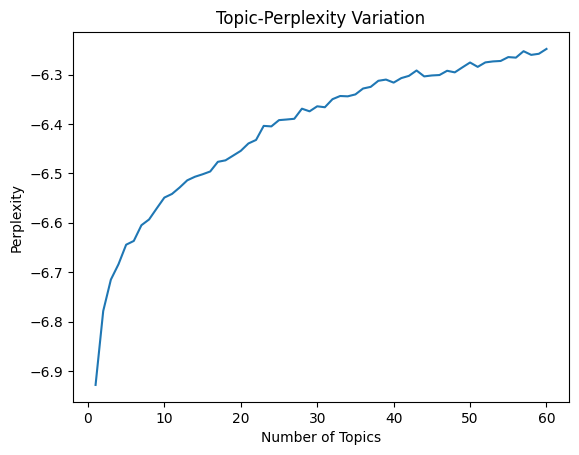

In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from numba import jit
import matplotlib.pyplot as plt

# Convert the preprocessed text in "Processed Corpus" to a list of lists
seg_lst = [text.split() for text in corpus_data["Processed Corpus"]]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(seg_lst)
corpus = [dictionary.doc2bow(i) for i in seg_lst]

# Function to calculate perplexity
def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=30, random_state=42)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=15))
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)

# JIT-compiled function for perplexity calculation
@jit(target_backend='cuda')
def perplexity_count(num_topics):
    x = range(1, num_topics + 1)
    y = [perplexity(i) for i in x]
    return x, y

# Calculate perplexity for different numbers of topics
x, y = perplexity_count(60)

# Plot perplexity results
plt.plot(x, y)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")
plt.title("Topic-Perplexity Variation")
plt.show()


<ipython-input-6-7c1964c2c02b>:23: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "coherence_count" failed type inference due to: Untyped global name 'coherence': Cannot determine Numba type of <class 'function'>

File "<ipython-input-6-7c1964c2c02b>", line 26:
def coherence_count(num_topics):
    <source elided>
    x = range(1, num_topics + 1)
    y = [coherence(i) for i in x]
    ^

  @jit(target_backend='cuda')
/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "coherence_count" was compiled in object mode without forceobj=True.

File "<ipython-input-6-7c1964c2c02b>", line 24:
@jit(target_backend='cuda')
def coherence_count(num_topics):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detec

[(0, '0.050*"." + 0.043*"," + 0.031*"robot" + 0.018*";" + 0.014*"(" + 0.014*")" + 0.012*"construction" + 0.011*"device" + 0.009*"building" + 0.008*"system" + 0.007*"drawing" + 0.007*"shows" + 0.006*"control" + 0.006*"connected" + 0.006*"provided"')]
0.29373244796296366
[(0, '0.049*"." + 0.047*"," + 0.025*"robot" + 0.019*";" + 0.015*"device" + 0.012*"(" + 0.012*")" + 0.011*"construction" + 0.011*"building" + 0.010*"connected" + 0.009*"provided" + 0.009*"mechanism" + 0.007*"plate" + 0.007*"end" + 0.007*"frame"'), (1, '0.052*"." + 0.040*"robot" + 0.039*"," + 0.017*")" + 0.017*"(" + 0.016*";" + 0.014*"construction" + 0.013*"system" + 0.012*"method" + 0.010*"control" + 0.007*"drawing" + 0.007*"building" + 0.007*"shows" + 0.006*"information" + 0.006*"device"')]
0.3606300407223584
[(0, '0.050*"." + 0.031*"," + 0.026*"robot" + 0.015*";" + 0.014*"system" + 0.014*"construction" + 0.013*"(" + 0.013*")" + 0.012*"method" + 0.010*"building" + 0.009*"information" + 0.009*"control" + 0.008*"device" + 

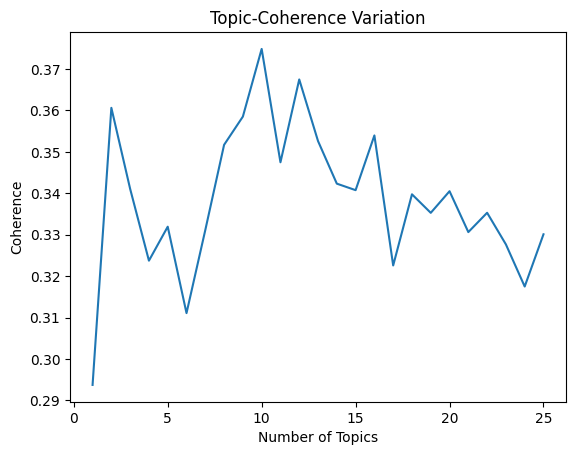

In [ ]:

from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from numba import jit
import matplotlib.pyplot as plt

# Convert the preprocessed text in "Processed Corpus" to a list of lists
seg_lst = [text.split() for text in corpus_data["Processed Corpus"]]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(seg_lst)
corpus = [dictionary.doc2bow(i) for i in seg_lst]

# Function to calculate coherence
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=30, random_state=42)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=15))
    ldacm = CoherenceModel(model=ldamodel, texts=seg_lst, dictionary=dictionary, coherence="c_v")
    print(ldacm.get_coherence())
    return ldacm.get_coherence()

# JIT-compiled function for coherence calculation
@jit(target_backend='cuda')
def coherence_count(num_topics):
    x = range(1, num_topics + 1)
    y = [coherence(i) for i in x]
    return x, y

# Calculate coherence for different numbers of topics
x, y = coherence_count(25)

# Plot coherence results
plt.plot(x, y)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence")
plt.title("Topic-Coherence Variation")
plt.show()


In [ ]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models


# Enable notebook mode for pyLDAvis
pyLDAvis.enable_notebook()

# Generate the visualization data
data = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)

# Display the visualization in the Jupyter Notebook
data


In [ ]:
# Save the visualization as an HTML file (uncomment this line if needed)
pyLDAvis.save_html(data, f"./{num_topics}_topic_model.html")
